In [10]:
import cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as tfs
import numpy as np
import torchvision.transforms as transforms

from torch.nn import functional as F
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchsummary import summary
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
from google.colab import drive
from torchvision.datasets import ImageFolder

# Задание 1
Примените следующие ядра к фото и сопоставьте эффект к ядру.

A)
```
[0, 0, 0],
[0, 1, 0],
[0, 0, 0]
```
Б)
```
[0, 1, 0],
[0, -2, 0],
[0, 1, 0]
```
В)
```
[0, 0, 0],
[1, -2, 1],
[0, 0, 0]
```
Г)
```
[0, 1, 0],
[1, -4, 1],
[0, 1, 0]
```
Д)
```
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]
```
Е)
```
[0.0625, 0.125, 0.0625],
[0.125, 0.25, 0.125],
[0.0625, 0.125, 0.0625]
```

1) Размытие

2) Увеличение резкости

3) Тождественное преобразование

4) Выделение вертикальных границ

5) Выделение горизонтальных границ

6) Выделение границ


--2022-11-24 05:28:43--  https://hvli.org/upload/files/30S.-Blaise-Pascal-1623-1662.jpg
Resolving hvli.org (hvli.org)... 46.4.49.184
Connecting to hvli.org (hvli.org)|46.4.49.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271193 (265K) [image/jpeg]
Saving to: ‘30S.-Blaise-Pascal-1623-1662.jpg’

30S.-Blaise-Pascal- 100%[===================>] 264.84K  --.-KB/s    in 0.07s   

2022-11-24 05:28:43 (3.66 MB/s) - ‘30S.-Blaise-Pascal-1623-1662.jpg’ saved [271193/271193]



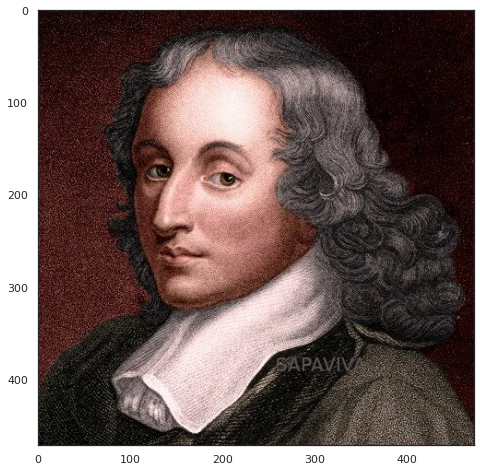

In [2]:
!wget https://hvli.org/upload/files/30S.-Blaise-Pascal-1623-1662.jpg

sns.set(style="white")
img = cv2.imread("/content/30S.-Blaise-Pascal-1623-1662.jpg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(RGB_img)
plt.show()

In [3]:
def apply_kernel(kernel):
  img_t = torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0)
  kernel = torch.tensor(
    kernel
  ).reshape(1, 1, 3, 3).type(torch.float32)
  kernel = kernel.repeat(3, 3, 1, 1)
  img_t = img_t.permute(0, 3, 1, 2) 
  img_t = nn.ReflectionPad2d(1)(img_t)

  result = F.conv2d(img_t, kernel)[0]
  plt.figure(figsize=(12, 8))
  result_np = result.permute(1, 2, 0).numpy() / 256 / 3

  plt.imshow(result_np)
  plt.show()

In [4]:
img_t = torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0)

Пример

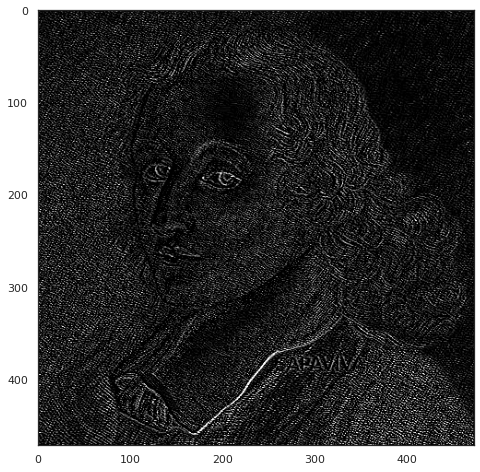

In [5]:
apply_kernel([[0, 1, 1],
              [-1, -1, -1],
              [2, 1, -2]])

## Выполнение

# Задание 2
Обучите сверточную нейронную сеть на датасете MNIST. Сделать вывод по результатам обучения.

In [21]:
if torch.cuda.is_available() == True:
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

device

device(type='cuda')

In [13]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

loaders = {"train": train_dataloader,
           "valid": val_dataloader}

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [22]:
class SimpleConvNet(nn.Module):
  def __init__(self):
    # вызов конструктора предка
    super(SimpleConvNet, self).__init__()



  def forward(self, x):
    
    return x

In [ ]:
model = SimpleConvNet()
model.to(device)

summary(model, (1, 28, 28), device="cuda")

In [26]:
criterion = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

In [ ]:
max_epochs = 5
accuracy = {"train": [], "valid": []}

for epoch in range(max_epochs):
  for k, dataloader in loaders.items():
    epoch_correct = 0
    epoch_all = 0
    for x_batch, y_batch in dataloader:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      if k == "train":
        model.train()
        optimizer.zero_grad()
        outp = model(x_batch)
        o = outp
      else:
        model.eval()
        with torch.no_grad():
          outp = model(x_batch)
      preds = outp.argmax(-1)
      correct = accuracy_score(y_batch.cpu(), preds.cpu()) * len(x_batch)
      all = len(x_batch)
      epoch_correct += correct
      epoch_all += all
      if k == "train":
        loss = criterion(outp, y_batch)
        loss.backward()
        optimizer.step()
    if k == "train":
      print(f"Epoch: {epoch+1}")
    print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
    accuracy[k].append(epoch_correct / epoch_all)

**Вывод:**

# Задание 3

Реализуйте LeNet

Если мы сделаем параметры сверток обучаемыми, то можем добиться хороших результатов для задач компьютерного зрения. Реализуйте архитектуру LeNet, предложенную еще в 1998 году!
На этот раз используйте модульную структуру (без помощи класса Sequential). 

Наша нейронная сеть будет состоять из
* Свёртки 3x3 (1 карта на входе, 6 на выходе) с активацией ReLU;
* MaxPooling-а 2x2;
* Свёртки 3x3 (6 карт на входе, 16 на выходе) с активацией ReLU;
* MaxPooling-а 2x2;
* Уплощения (nn.Flatten);
* Полносвязного слоя со 120 нейронами и активацией ReLU;
* Полносвязного слоя с 84 нейронами и активацией ReLU;
* Выходного слоя из 10 нейронов.




In [2]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    
  
  def forward(self, x):
    return x